In [1]:
import numpy as np 
import pandas as pd 
import sklearn 
from sklearn import model_selection 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.svm import SVC, LinearSVC 
import matplotlib.pyplot as plt 
%matplotlib inline 
import pickle

In [2]:
features_train = pickle.load(open('features_train', 'rb'))
labels_train = pickle.load(open('labels_train', 'rb'))
print(len(features_train), len(labels_train))

4320 4320


In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features_train, labels_train, test_size=0.2, random_state=42)

In [4]:
clf = LinearSVC(C=1.0, loss='squared_hinge', 
                penalty='l2', multi_class='ovr')
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [5]:
y_pred = clf.predict(X_test)

In [6]:
def plot_confusion_matrix(y_true,y_pred): 
	cm_array = confusion_matrix(y_true,y_pred) 
	true_labels = np.unique(y_true) 
	pred_labels = np.unique(y_pred) 
	plt.imshow(cm_array[:-1,:-1], interpolation='nearest', cmap=plt.cm.Blues) 
	plt.title("Confusion matrix", fontsize=16) 
	cbar = plt.colorbar(fraction=0.046, pad=0.04) 
	cbar.set_label('Number of images', rotation=270, labelpad=30, fontsize=12) 
	xtick_marks = np.arange(len(true_labels)) 
	ytick_marks = np.arange(len(pred_labels)) 
	plt.xticks(xtick_marks, true_labels, rotation=90) 
	plt.yticks(ytick_marks,pred_labels) 
	plt.tight_layout() 
	plt.ylabel('True label', fontsize=14) 
	plt.xlabel('Predicted label', fontsize=14) 
	fig_size = plt.rcParams["figure.figsize"] 
	fig_size[0] = 12 
	fig_size[1] = 12 
	plt.rcParams["figure.figsize"] = fig_size 

In [7]:
print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy: 70.1%


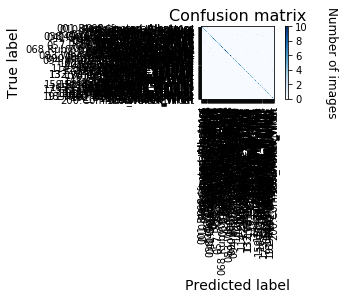

In [8]:
plot_confusion_matrix(y_test,y_pred)

# Predict test

First, retrain with all the training data - ok, as long as we're not using it to set hyperparameters or evaluate internal accuracy.

In [9]:
clf = LinearSVC(C=1.0, loss='squared_hinge', 
                penalty='l2', multi_class='ovr')
clf.fit(features_train, labels_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [10]:
# sanity check - how well do we do on the data on which we trained
print("Accuracy: {0:0.1f}%".format(accuracy_score(labels_train,clf.predict(features_train))*100))

Accuracy: 100.0%


In [38]:
features_test = pickle.load(open('features_test', 'rb'))
len(features_test)

4320

In [39]:
test_pred = clf.predict(features_test)
test_pred.shape

(4320,)

In [40]:
test_pred[:3]

array(['050.Eared_Grebe', '147.Least_Tern', '072.Pomarine_Jaeger'], 
      dtype='<U29')

In [41]:
test_pred[1].split('.')[0]

'147'

In [42]:
list(range(1,len(features_test)+1))[-3:]

[4318, 4319, 4320]

In [43]:
test_results_for_output = pd.DataFrame({
    'Id': range(1,len(features_test)+1),
    'Prediction': pd.Series(test_pred).apply(lambda pred: pred.split('.')[0].lstrip('0'))
})
test_results_for_output.shape

(4320, 2)

In [45]:
test_results_for_output[:3]

,Id,Prediction
0,1,50
1,2,147
2,3,72


In [46]:
test_results_for_output.to_csv('test.csv', index=False)

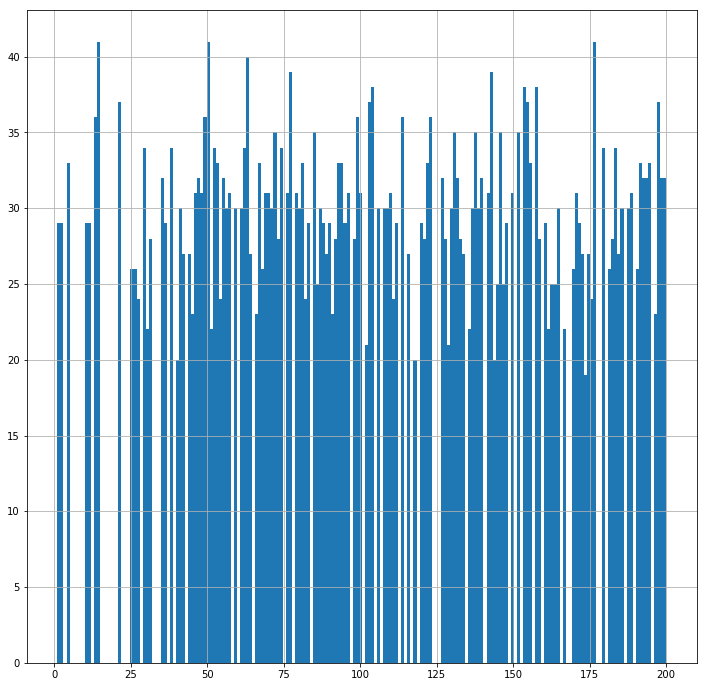

In [44]:
test_results_for_output['Prediction'].astype(int).hist(bins=200)

In [20]:
len(set(labels_train))

144

In [21]:
len(test_results_for_output['Prediction'].unique())

137

In [22]:
test_results_for_output['Prediction'].value_counts(dropna=False)

1      89
14     73
13     66
2      61
11     60
4      53
177    41
5      41
63     40
77     39
143    39
154    38
104    38
158    38
21     37
103    37
198    37
155    37
123    36
114    36
49     36
99     36
138    35
131    35
72     35
152    35
85     35
146    35
62     34
18     34
       ..
25     26
17     26
191    26
26     26
182    26
68     26
145    25
164    25
163    25
147    25
86     25
176    24
82     24
54     24
27     24
111    24
66     23
91     23
197    23
45     23
167    22
136    22
162    22
51     22
3      22
102    21
129    21
118    20
144    20
174    19
Name: Prediction, dtype: int64

In [37]:
pd.Series(labels_train).apply(lambda label: label.split('.')[0].lstrip('0'))

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
       ... 
4290    200
4291    200
4292    200
4293    200
4294    200
4295    200
4296    200
4297    200
4298    200
4299    200
4300    200
4301    200
4302    200
4303    200
4304    200
4305    200
4306    200
4307    200
4308    200
4309    200
4310    200
4311    200
4312    200
4313    200
4314    200
4315    200
4316    200
4317    200
4318    200
4319    200
dtype: object

In [23]:
ids_in_training_set = pd.Series(labels_train).apply(lambda label: label.split('.')[0].strip('0')).unique()

In [24]:
len(ids_in_training_set)

137

In [35]:
ids_in_training_set[-10:]

array(['188', '189', '191', '192', '193', '194', '195', '197', '198', '199'], dtype=object)

In [25]:
ids_in_training_set

array(['1', '2', '4', '11', '13', '14', '21', '25', '26', '27', '29', '3',
       '31', '35', '36', '38', '41', '42', '44', '45', '46', '47', '48',
       '49', '5', '51', '52', '53', '54', '55', '56', '57', '59', '61',
       '62', '63', '64', '66', '67', '68', '69', '7', '71', '72', '73',
       '74', '76', '77', '79', '8', '81', '82', '83', '85', '86', '87',
       '88', '89', '9', '91', '92', '93', '94', '95', '96', '98', '99',
       '102', '103', '104', '106', '108', '109', '111', '112', '114',
       '116', '118', '12', '121', '122', '123', '127', '128', '129', '131',
       '132', '133', '134', '136', '137', '138', '139', '142', '143',
       '144', '145', '146', '147', '148', '15', '152', '154', '155', '156',
       '158', '159', '161', '162', '163', '164', '165', '167', '17', '171',
       '172', '173', '174', '175', '176', '177', '18', '182', '183', '184',
       '185', '186', '188', '189', '191', '192', '193', '194', '195',
       '197', '198', '199'], dtype=object)

In [26]:
import images_to_features

In [27]:
foo = images_to_features.get_image_list("train")

In [29]:
foo[-5:]

['images/train/200.Common_Yellowthroat/Common_Yellowthroat_0114_190501.jpg',
 'images/train/200.Common_Yellowthroat/Common_Yellowthroat_0118_190805.jpg',
 'images/train/200.Common_Yellowthroat/Common_Yellowthroat_0121_190597.jpg',
 'images/train/200.Common_Yellowthroat/Common_Yellowthroat_0122_190570.jpg',
 'images/train/200.Common_Yellowthroat/Common_Yellowthroat_0125_190902.jpg']

In [30]:
len(foo)

4320

In [33]:
len(labels_train)

4320

In [34]:
labels_train[-10:]

['200.Common_Yellowthroat',
 '200.Common_Yellowthroat',
 '200.Common_Yellowthroat',
 '200.Common_Yellowthroat',
 '200.Common_Yellowthroat',
 '200.Common_Yellowthroat',
 '200.Common_Yellowthroat',
 '200.Common_Yellowthroat',
 '200.Common_Yellowthroat',
 '200.Common_Yellowthroat']